# Assignment: Linear Regression
## Task 1: Simple Linear Regression (Single Feature)

In this task, we use the **California Housing Dataset** to predict `median_house_value` which is our target variable using a single feature variable, `housing_median_age`.

First we load the data and extract relevant columns.

In [1]:
import pandas as pd

data = pd.read_csv("./housing.csv")
ages = data['housing_median_age'].values
house_values = data['median_house_value'].values

Print shape for our columns.

In [2]:
print(f'ages {ages.shape}\nhouse_values {house_values.shape}')

ages (20640,)
house_values (20640,)


In [3]:
pd.Series(ages).describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
dtype: float64

In [4]:
pd.Series(house_values).describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
dtype: float64

There are no missing values.
We normalize the scale for `house_rentals` and `ages` to align closer to each other.

In [5]:
house_values = house_values / 100000
ages = ages / 100

pd.Series(ages).describe()

count    20640.000000
mean         0.286395
std          0.125856
min          0.010000
25%          0.180000
50%          0.290000
75%          0.370000
max          0.520000
dtype: float64

In [6]:
pd.Series(house_values).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

We select `ages` (`housing_median_age`) as the only input feature as we are doing single feature regression.

The median age of houses may affect the values of houses as the age of houses often reflects quality, development stage and desirability of property.

In [7]:
x = ages # feature
y = house_values # label

# Reshape x as sklearn expects a 2D array for features
x = x.reshape(-1, 1) 

We now choose the Linear Regression algorithm for the task of predicting the value of houses using their ages.

Linear Regression ends up being our choice as the `median_house_values` is a continuous target variable and we are modelling a linear relationship between the house values and housing ages.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Here, we also use Mean Squared Error (MSE) as our loss(cost) function.

MSE calculates the average of the squared differences between actual and predicted values. It penalizes larger errors more heavily.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

We split the data for training and testing. the test size is set to 20% of the data with the remaining 80% being used for training.

In [10]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Now, we predict the test data using trained model.

In [11]:
values_pred = model.predict(x_test)

Calculating the evaluation metrics MSE and $R^2$.

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, values_pred)
r2 = r2_score(y_test, values_pred)

print(f"Mean Squared Error: {mse}, R² Score: {r2}")

Mean Squared Error: 1.2939617265100323, R² Score: 0.012551235533311389


### Visualization
Regression Line

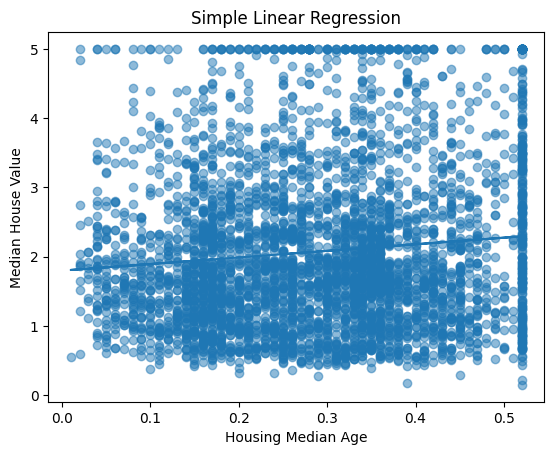

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, alpha=0.5)
plt.plot(x_test, values_pred)
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()

Predicted vs Actual Values

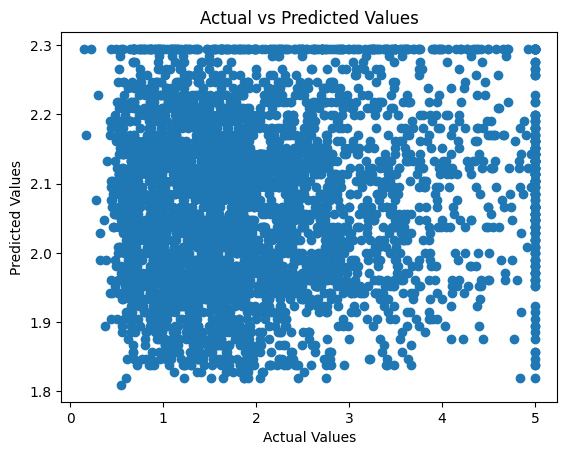

In [14]:
plt.scatter(y_test, values_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Interpretation of the model
We calculate the coefficient and intercept of our model for interpretation.

The coefficient is the change in median house value for one unit of change in median housing age.

The intercept represents predicted house value when age is zero.

In [15]:
coeff = model.coef_[0]
intercept = model.intercept_

print("Coefficient:", coeff)
print("Intercept:", intercept)


Coefficient: 0.9514618671496017
Intercept: 1.7997500158647475


## Task 2: Multiple Linear Regression (All Features)

For this task we build a linear regression model using all available input features except he label `median_house_values` to predict housing prices.

We reuse the dataset loaded earlier.

In [16]:
data.shape

(20640, 10)

In [17]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')

Check for missing values and data types.

In [18]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

Here, there are missing values for the variable `total_bedrooms`. Also, the `ocean_proximity` variable is also a string, specifically a categorical variable rathar than numerical, so it requires encoding.

Thus, the data cleaning step needs to address these two issues.

The missing values are handled by filling them with the median values. The categorical variable was encoded using one-hot encoding which converts the data into a binary matrix

In [20]:
# fill missing values in total_bedrooms with median
data['total_bedrooms'] = data['total_bedrooms'].fillna(
    data['total_bedrooms'].median()
)

#encode ocean_proximity using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

Recheck for missing values and data types. 

In [21]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [22]:
data.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object

Now, instead of one feature like in the previous task, we use all variables except the label.

In [26]:
# Features: all columns except the target
x = data.drop('median_house_value', axis=1)

# Label
y = data['median_house_value']

For feature scaling in multiple regression, we use the `StandardScalar` module of scikit-lean.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Then, we use linear regression to train the model once again.

In [28]:
# selection of model
from sklearn.linear_model import LinearRegression

model_multi = LinearRegression()


# splitting of data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

# model training
model_multi.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Now, the multiple linear regression model has been trained using all our training parameters. 

We now predict using our model and evaluate it. 

In [29]:
y_pred = model_multi.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse_multi = mean_squared_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_multi}, R² Score: {r2_multi}")

Mean Squared Error: 4908476721.156616, R² Score: 0.6254240620553606


Model Interpretation:

In [32]:
intercept = model_multi.intercept_
coefficients = model_multi.coef_

coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": coefficients
})

coef_df

,Feature,Coefficient
0,longitude,-53770.029490
1,latitude,-54397.869794
2,housing_median_age,13871.277832
3,total_rooms,-13136.290362
4,total_bedrooms,43107.993243
5,population,-43228.323370
6,households,18448.016131
7,median_income,74991.698606
8,ocean_proximity_INLAND,-18519.174847
9,ocean_proximity_ISLAND,2118.437572


### Model Conparision

As we can see from the results, multiple linear regression performs better than single linear regression. The $R^2$ value for multiple regression is 0.62 whereas it was 0.12 for single regression. This indicates that the multiple linear regression model explains 62% of the variance in the target variable, while the single linear regression model only explains 12%.

Housing prices depend on many factors such as income, population, and number of rooms. Including multiple features allowed the model to capture these relationships.

In terms of interpretation, the single variable regression is much easier due to the lack of a large number of variables. It allows for easy intuition as well as understanding though visualization.